## TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB

X : all columns except for the label

Train-test split: .80-.20 (please use the stratify parameter)

Cross-validation both with k=5 and k=10

## Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.

In [63]:
import pandas as pd                                                             #importing libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier

model = GaussianNB()                                                            #creating model with GaussianNB
data=pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")                      #read the file
Cdrglob = data["CDRGLOB"]                                                       #read file and find "CDRGLOB" label and synchronize it Cdrglob 
except_Cdrglob = data.drop('CDRGLOB', axis=1)                                   #drop CDRGLOB from data and synchronize it except_Cdrglob
X1, X2, y1, y2 = train_test_split(except_Cdrglob,Cdrglob , random_state=0,      #split data to test and train
                                  train_size=0.2)
model.fit(X1,y1)                                                                

CV_score = cross_val_score(model, X1, y1, cv=5)                                 #cv=5
CV_score2 = cross_val_score(model, X1, y1, cv=10)                               #cv=10
print(CV_score,"\n","----------------------------------------","\n",CV_score2)  #print cv=5 and cv=10
print("\n",CV_score.mean(),"\n","---------------------","\n",CV_score2.mean())  #Means of cv=5 and cv=10

[0.57407407 0.57407407 0.53703704 0.40740741 0.61111111] 
 ---------------------------------------- 
 [0.48148148 0.62962963 0.59259259 0.37037037 0.55555556 0.74074074
 0.44444444 0.37037037 0.77777778 0.59259259]

 0.5407407407407407 
 --------------------- 
 0.5555555555555556


I prefer to use cv=5 because means are close but in cv=10 some crossed values are far away from each other. Like first one is 0.48148 and second one is 0.6296.

## TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values. 

In [54]:
model=DecisionTreeClassifier()                                                  #make model from DecisionTreeClassifier
model.fit(X1, y1)                                                               #learn model
y_model2 = model.predict(X2)                                                    #predicted model
param_grid = {'max_depth': [1,2,5,10,20],                                       #some parameters for gridsearch
              'random_state': [0,1,2,5,10],
              'max_leaf_nodes' : [2,4,6,10,20]}

grid = GridSearchCV(model, param_grid, cv=10)                                   #gridsearch
grid.fit(X1, y1)                                                                #try parameters
print(grid.best_params_)                                                        #print the best parameters
best_grid = grid.best_estimator_                                                #write the best parameters to best_grid
grid_best = best_grid.fit(X1, y1).predict(X2)                                   #learn with best parameters

print("accuracy score for default parameters: ",accuracy_score(y2,y_model2))
print("Accuracy score for best parameters: ",accuracy_score(y2,grid_best))

{'max_depth': 2, 'max_leaf_nodes': 4, 'random_state': 0}
accuracy score for default parameters:  0.5830258302583026
Accuracy score for best parameters:  0.6392988929889298


## TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels. For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

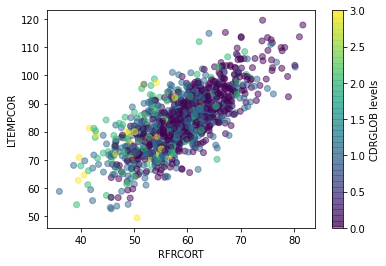

In [55]:
plt.scatter(X2["LTEMPCOR"], X2["RFRCORT"],c=y2,alpha=0.5)     #plotting LTEMPCOR and RFRCORT
plt.colorbar(label="CDRGLOB")
plt.xlabel("RFRCORT")
plt.ylabel("LTEMPCOR")
plt.show();

## TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions. 

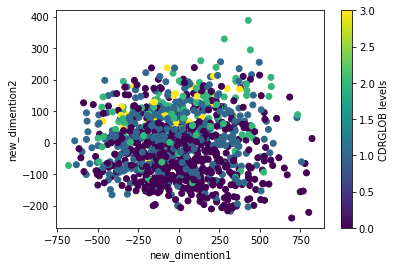

In [53]:
asina = PCA(n_components = 2)
fit_asina = asina.fit_transform(X2)
plt.scatter(fit_asina[:,0], fit_asina[:,1], c=y2)

plt.colorbar(label="CDRGLOB")
plt.xlabel ("new_dimention1")
plt.ylabel ("new_dimention2")
plt.clim(0, 3);

## TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education. 

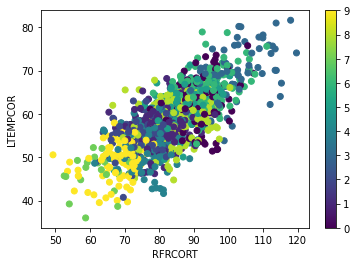

In [68]:
model=KMeans(n_clusters=10)
model.fit(X1,y1)
model_new=model.predict(X2)

plt.scatter(X2["RFRCORT"], X2["LTEMPCOR"],c=model_new)
plt.colorbar()
plt.ylabel("LTEMPCOR")
plt.xlabel("RFRCORT")
plt.show();